<a href="https://colab.research.google.com/github/harikuts/gesture_id/blob/master/Gesture_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

Using EMG data to classify different hand gestures.

http://archive.ics.uci.edu/ml/datasets/EMG+data+for+gestures# 


## Planning

### Current Project Goals
1. Decide on project organization structure
    - Google Drive vs Google Team Drive
    - Data Frames Structure
2. Import data using Pandas
    - Shown Below(Done?)
    - Split Up Data Frames for different gestures?
3. Parse and organize data into data objects
    - Try in Pandas first(Done?)
4. Train simple Logistic Regression model using Tensor Flow
5. Train a simple Neural Net model
6. Experiment with more complex models

## Helpful Resources

[Intro to Pandas](https://colab.research.google.com/notebooks/mlcc/intro_to_pandas.ipynb?utm_source=mlcc&utm_campaign=colab-external&utm_medium=referral&utm_content=pandas-colab&hl=en#scrollTo=rHLcriKWLRe4)

[Helpful Guide on Pandas Commands](https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/)

[First Steps with Tensor Flow](https://colab.research.google.com/notebooks/mlcc/first_steps_with_tensor_flow.ipynb?utm_source=mlcc&utm_campaign=colab-external&utm_medium=referral&utm_content=firststeps-colab&hl=en#scrollTo=5M-Kt6w8U803)

[Train your first neural network: basic classification](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/basic_classification.ipynb#scrollTo=jYysdyb-CaWM)

[ML Crash Course With Google using TensorFlow](https://developers.google.com/machine-learning/crash-course/)

# Set Up

Run this code to mount the Google Team drive and set up the environment.

## Mount drives

Run this code to mount drives.

In [9]:
# Call to mount Google Drive for Data Aquisition
# Only needs to be run once
from google.colab import drive

# Grab google drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Git Check-in

*File -> Save a Copy in Github...*

# Code

All code, experimental and application.

## Main
The main body of code.

Processing patient 1 ...
	Added data from 1_raw_data_13-12_22.03.16.txt !
	Added data from 2_raw_data_13-13_22.03.16.txt !
Processing patient 2 ...
	Added data from 1_raw_data_14-19_22.03.16.txt !
	Added data from 2_raw_data_14-21_22.03.16.txt !
Processing patient 3 ...
	Added data from 1_raw_data_09-32_11.04.16.txt !
	Added data from 2_raw_data_09-34_11.04.16.txt !
Processing patient 4 ...
	Added data from 1_raw_data_18-02_24.04.16.txt !
	Added data from 2_raw_data_18-03_24.04.16.txt !


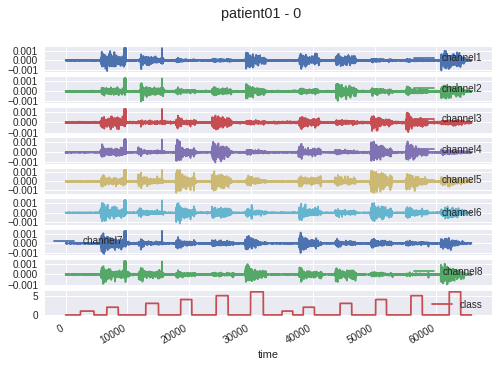

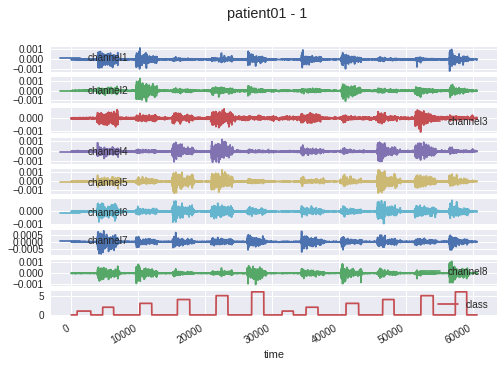

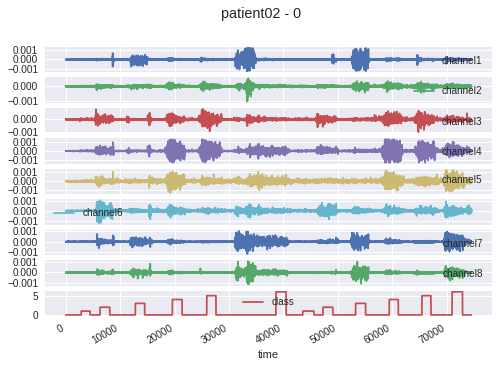

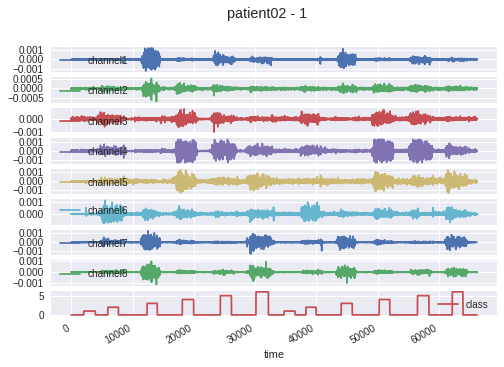

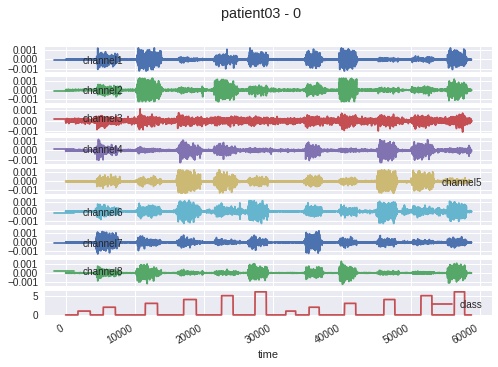

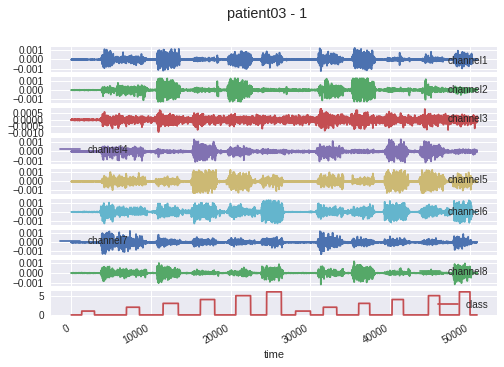

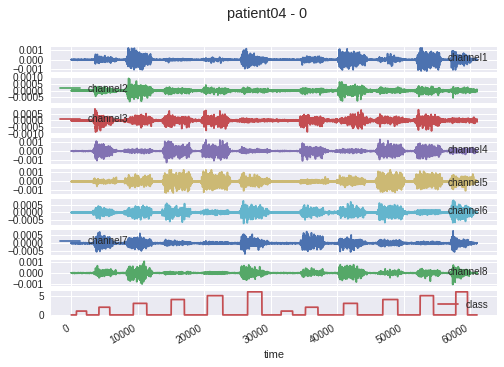

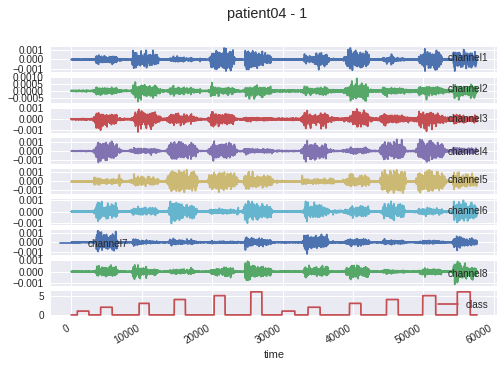

In [15]:
import os
import pdb
import pandas as pd

# Find file path (may be unnecesary)
# !ls "/content/drive/Team Drives/Gestures Project/repo/"
# Specify file path
repopath = '/content/drive/Team Drives/Gestures Project/repo/'

# Specify range of patients
PATIENTS = {1, 2, 3, 4}
CHANNELS = ["channel" + str(x) for x in range(1,9)]
COLUMNS = CHANNELS[:].append("class")

# Set patient dictionary
patientDict = {}

# STRUCTURE: patientDict[patient number][series number] -> pandas data file
# Grab data from patient
for patient in PATIENTS:
  print ("Processing patient", str(patient), "...")
  # Create identifier tag
  identifier = "%02d" % (patient)
  # Create patient path and grab data files and store them in each patient entry
  patientDict[identifier] = []
  patientPath = repopath + identifier + "/"
  patientFiles = os.listdir(patientPath)
  for file in patientFiles:
    path = patientPath + file
    # Import data into pandas tables
    try:
      patientDict[identifier].append(pd.read_table(path))
      print ("\tAdded data from", file, "!")
    except Exception as e:
      print ("Could not import data to patient", identifier, "from", patientPath, "\n", str(e))

# PLOTTING
# Per patient and series
for patient in PATIENTS:
  identifier = "%02d" % (patient)
  for ind in range(len(patientDict[identifier])):
    patientDict[identifier][ind].plot(x='time', y=COLUMNS, subplots=True, title="patient%s - %d" % (identifier, ind))


## Playground
Experimental features and general sandbox.

In [0]:
import os
import pdb
import pandas as pd

# Find file path (may be unnecesary).
# !ls "/content/drive/Team Drives/Gestures Project/repo/"
# Specify file path.
repopath = '/content/drive/Team Drives/Gestures Project/repo/'

# Import Data Example
data = pd.read_table(repopath + '01/1_raw_data_13-12_22.03.16.txt')
print(type(data))

# Common Commands on DataFrame
# Gives Rows and Columns of Data
print(data.shape)
# Gives Data Dimensions
print(data.ndim)
# Gives Data types of each column
print(data.dtypes)
# Grab individual Columns
print(data['channel1'])
# Grab statistics on Column
print(data['channel1'].describe())